<a href="https://colab.research.google.com/github/amasnaoui/Classification_damaged_not_damaged_car/blob/main/90vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/new_cars_dataset/training/'
valid_path = '/content/drive/MyDrive/new_cars_dataset/validation/'
test_path = '/content/drive/MyDrive/new_cars_dataset/test/'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/new_cars_dataset/training/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
# x = Dense(2,activation='softmax')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

testt_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/new_cars_dataset/training/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/new_cars_dataset/validation/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

testt_set = testt_datagen.flow_from_directory('/content/drive/MyDrive/new_cars_dataset/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4032 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  verbose = 1
)

Epoch 1/20
126/126 [==============================] - 72s 558ms/step - loss: 0.3173 - accuracy: 0.8708 - val_loss: 0.1628 - val_accuracy: 0.9453
Epoch 2/20
126/126 [==============================] - 71s 566ms/step - loss: 0.2528 - accuracy: 0.8963 - val_loss: 0.1677 - val_accuracy: 0.9359
Epoch 3/20
126/126 [==============================] - 71s 567ms/step - loss: 0.2376 - accuracy: 0.9025 - val_loss: 0.1733 - val_accuracy: 0.9344
Epoch 4/20
126/126 [==============================] - 71s 567ms/step - loss: 0.2280 - accuracy: 0.9065 - val_loss: 0.1552 - val_accuracy: 0.9375
Epoch 5/20
126/126 [==============================] - 70s 556ms/step - loss: 0.2127 - accuracy: 0.9177 - val_loss: 0.1491 - val_accuracy: 0.9375
Epoch 6/20
126/126 [==============================] - 71s 566ms/step - loss: 0.2092 - accuracy: 0.9172 - val_loss: 0.1613 - val_accuracy: 0.9359
Epoch 7/20
126/126 [==============================] - 71s 566ms/step - loss: 0.2038 - accuracy: 0.9129 - val_loss: 0.1743 - val_ac

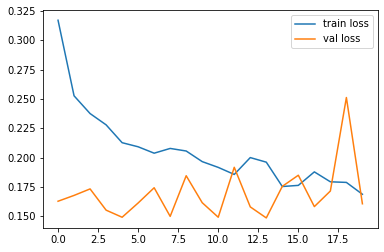

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

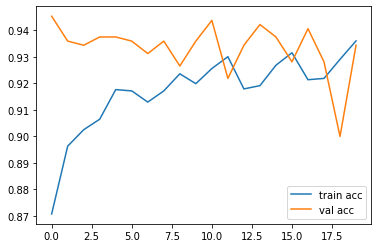

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
scores = model.evaluate(testt_set, verbose = 1)
print("Accuracy : %.2f%%" % (scores[1]*100))

7/7 [==============================] - 2s 204ms/step - loss: 0.2919 - accuracy: 0.9045
Accuracy : 90.45%


In [ ]:
#weights saving
model.save("/content/drive/MyDrive/new_cars_dataset/models/90%_vgg16_classifier.h5")

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/models/90%_vgg16_classifier.h5")

In [ ]:
import os
dir_path = '/content/drive/MyDrive/test/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i, target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if np.argmax(val) == 0 :
    print("damaged car")
  else :
    print("Not damaged car")